In [41]:
import numpy as np
import matplotlib.pyplot as plt     #importing everything
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as st
import scipy.special as sp
import csv
import math
import pandas as pd
import sklearn.metrics as met
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from copy import deepcopy
import re

In [4]:
#print repr(open('../data/blogtext.csv', 'rb').read(200))
f = open('../data/blogtext.csv',encoding="utf8")
data = csv.reader(f)
count = 0
for row in data:    
    count += 1
    
count

SyntaxError: invalid syntax (<ipython-input-4-907a6e49cd7a>, line 1)

In [5]:
df = pd.read_csv('../data/blogtext.csv')
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [6]:
df.date = pd.to_datetime(df.date , infer_datetime_format = True, errors = 'coerce')

In [7]:
df.dtypes

id                 int64
gender            object
age                int64
topic             object
sign              object
date      datetime64[ns]
text              object
dtype: object

In [8]:
df.describe(include = 'O').transpose()

,count,unique,top,freq
gender,681284,2,male,345193
topic,681284,40,indUnk,251015
sign,681284,12,Cancer,65048
text,681284,611652,urlLink,445


In [9]:
df.describe(exclude = 'O').transpose()

<ipython-input-9-06429e832fe1>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude = 'O').transpose()


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
id,681284,NaN,NaT,NaN,NaT,NaT,2.3978e+06,1.24772e+06,5114,1.23961e+06,2.60758e+06,3.52566e+06,4.33765e+06
age,681284,NaN,NaT,NaN,NaT,NaT,23.9323,7.78601,13,17,24,26,48
date,673538,1736,2004-08-02,16546,1999-01-01,2006-08-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='date'>

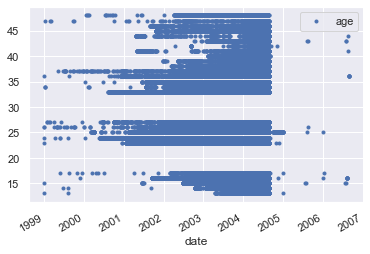

In [10]:
df.plot(x = 'date', y ='age', style = '.' )

In [13]:
df.shape

(681284, 7)

In [14]:
df.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [15]:
dg = df[['gender','age','date']]

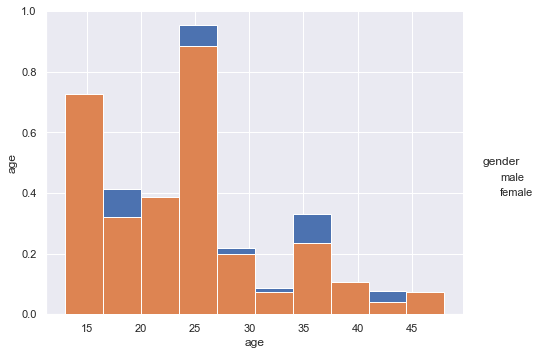

In [23]:

g = sns.PairGrid(dg, hue="gender",height=5,aspect=12/9)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

In [24]:
zod_counts = dict()

for

In [29]:
type(dz)

pandas.core.frame.DataFrame

In [34]:
dz.value_counts()

sign       
Cancer         65048
Aries          64979
Taurus         62561
Libra          62363
Virgo          60399
Scorpio        57161
Pisces         54053
Leo            53811
Gemini         51985
Sagittarius    50036
Aquarius       49687
Capricorn      49201
dtype: int64

In [35]:
dz.value_counts(normalize=True)

sign       
Cancer         0.095479
Aries          0.095377
Taurus         0.091828
Libra          0.091537
Virgo          0.088655
Scorpio        0.083902
Pisces         0.079340
Leo            0.078985
Gemini         0.076304
Sagittarius    0.073444
Aquarius       0.072931
Capricorn      0.072218
dtype: float64

<AxesSubplot:>

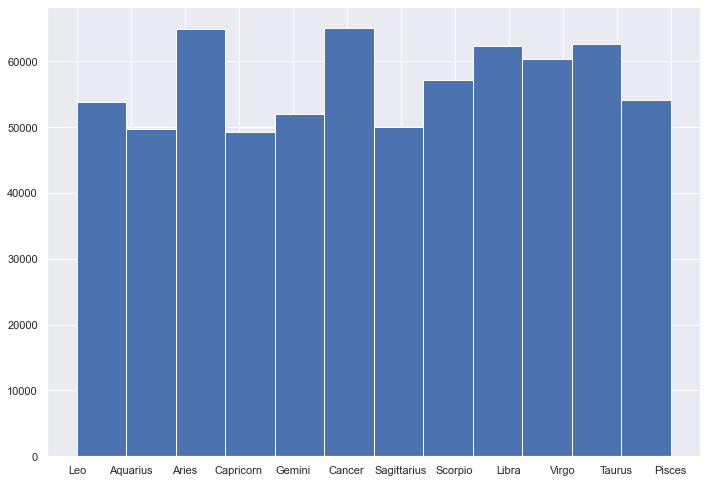

In [37]:
df['sign'].hist(bins=12)

In [38]:
#cleaning up the data
df.drop(['id','gender','age','topic','date'], axis=1, inplace=True)

In [39]:
df.head(10)

,sign,text
0,Leo,"Info has been found (+/- 100 pages,..."
1,Leo,These are the team members: Drewe...
2,Leo,In het kader van kernfusie op aarde...
3,Leo,testing!!! testing!!!
4,Aquarius,Thanks to Yahoo!'s Toolbar I can ...
5,Aquarius,I had an interesting conversation...
6,Aquarius,Somehow Coca-Cola has a way of su...
7,Aquarius,"If anything, Korea is a country o..."
8,Aquarius,Take a read of this news article ...
9,Aquarius,I surf the English news sites a l...


In [42]:
df['clean_text']=df['text'].apply(lambda x: re.sub(r'[^A-Za-z]+',' ',x))

In [43]:
df['clean_text']=df['clean_text'].apply(lambda x: x.lower())

In [44]:
df['clean_text']=df['clean_text'].apply(lambda x: x.strip())

In [62]:
word_counts = dict()

count = 0

ddf = df.head(10000)

for post in ddf['clean_text']:
    for word in post.split():
        cur = ddf['sign'][count] + '-' + word
        if cur in word_counts:
            word_counts[cur] += 1
        else:
            word_counts[cur] = 1
    count += 1

In [63]:
word_counts

{'Leo-info': 2,
 'Leo-has': 137,
 'Leo-been': 111,
 'Leo-found': 34,
 'Leo-pages': 2,
 'Leo-and': 1742,
 'Leo-mb': 1,
 'Leo-of': 1122,
 'Leo-pdf': 1,
 'Leo-files': 2,
 'Leo-now': 210,
 'Leo-i': 3125,
 'Leo-have': 456,
 'Leo-to': 2092,
 'Leo-wait': 23,
 'Leo-untill': 6,
 'Leo-our': 91,
 'Leo-team': 15,
 'Leo-leader': 2,
 'Leo-processed': 1,
 'Leo-it': 1285,
 'Leo-learns': 1,
 'Leo-html': 10,
 'Leo-these': 83,
 'Leo-are': 274,
 'Leo-the': 2527,
 'Leo-members': 2,
 'Leo-drewes': 1,
 'Leo-van': 3,
 'Leo-der': 1,
 'Leo-laag': 1,
 'Leo-urllink': 65,
 'Leo-mail': 10,
 'Leo-ruiyu': 1,
 'Leo-xie': 1,
 'Leo-bryan': 1,
 'Leo-aaldering': 1,
 'Leo-me': 474,
 'Leo-in': 783,
 'Leo-het': 1,
 'Leo-kader': 1,
 'Leo-kernfusie': 1,
 'Leo-op': 2,
 'Leo-aarde': 1,
 'Leo-maak': 1,
 'Leo-je': 1,
 'Leo-eigen': 1,
 'Leo-waterstofbom': 1,
 'Leo-how': 144,
 'Leo-build': 6,
 'Leo-an': 137,
 'Leo-h': 29,
 'Leo-bomb': 61,
 'Leo-from': 224,
 'Leo-ascott': 1,
 'Leo-tartarus': 1,
 'Leo-uwa': 1,
 'Leo-edu': 1,
 'Leo-au'

In [47]:
vocab = []

for post in ddf['clean_text']:
    for word in post.split():
        if not word in vocab:
            vocab.append(word)

In [48]:
vocab

['info',
 'has',
 'been',
 'found',
 'pages',
 'and',
 'mb',
 'of',
 'pdf',
 'files',
 'now',
 'i',
 'have',
 'to',
 'wait',
 'untill',
 'our',
 'team',
 'leader',
 'processed',
 'it',
 'learns',
 'html',
 'these',
 'are',
 'the',
 'members',
 'drewes',
 'van',
 'der',
 'laag',
 'urllink',
 'mail',
 'ruiyu',
 'xie',
 'bryan',
 'aaldering',
 'me',
 'in',
 'het',
 'kader',
 'kernfusie',
 'op',
 'aarde',
 'maak',
 'je',
 'eigen',
 'waterstofbom',
 'how',
 'build',
 'an',
 'h',
 'bomb',
 'from',
 'ascott',
 'tartarus',
 'uwa',
 'edu',
 'au',
 'andrew',
 'scott',
 'newsgroups',
 'rec',
 'humor',
 'subject',
 'humorous',
 'date',
 'feb',
 'gmt',
 'organization',
 'university',
 'western',
 'australia',
 'original',
 'file',
 'dated',
 'th',
 'november',
 'seemed',
 'be',
 'a',
 'transcript',
 'seven',
 'days',
 'article',
 'poorly',
 'formatted',
 'corrupted',
 'added',
 'text',
 'between',
 'examine',
 'under',
 'microscope',
 'malleable',
 'like',
 'gold',
 'as',
 'was',
 'missing',
 'if',

In [64]:
zods = ['Leo','Aquarius','Aries','Capricorn','Gemini','Cancer','Sagittarius','Scorpio','Libra','Virgo','Taurus','Pisces']

for word in vocab:
    sum = 0
    for sign in zods:
        if (sign + '-' + word) in word_counts:
            sum += word_counts[sign + '-' + word]
    for sign in zods:
        if (sign + '-' + word) in word_counts:
            word_counts[sign + '-' + word] /= sum
        else:
            word_counts[sign + '-' + word] = 0
    

In [65]:
word_counts['Aquarius-if']

0.09385696270942173

In [66]:
word_counts

{'Leo-info': 0.024691358024691357,
 'Leo-has': 0.04224483502929386,
 'Leo-been': 0.034730913642052566,
 'Leo-found': 0.04722222222222222,
 'Leo-pages': 0.02564102564102564,
 'Leo-and': 0.03897178907805544,
 'Leo-mb': 0.06666666666666667,
 'Leo-of': 0.03775997846133136,
 'Leo-pdf': 0.14285714285714285,
 'Leo-files': 0.05,
 'Leo-now': 0.05051719990377676,
 'Leo-i': 0.046596585402221724,
 'Leo-have': 0.04311649016641452,
 'Leo-to': 0.04395419686941906,
 'Leo-wait': 0.04483430799220273,
 'Leo-untill': 0.3333333333333333,
 'Leo-our': 0.03051643192488263,
 'Leo-team': 0.040983606557377046,
 'Leo-leader': 0.023255813953488372,
 'Leo-processed': 0.25,
 'Leo-it': 0.05222303503210599,
 'Leo-learns': 0.125,
 'Leo-html': 0.07633587786259542,
 'Leo-these': 0.060495626822157436,
 'Leo-are': 0.0389425810119386,
 'Leo-the': 0.03782254684787164,
 'Leo-members': 0.01680672268907563,
 'Leo-drewes': 1.0,
 'Leo-van': 0.061224489795918366,
 'Leo-der': 0.1111111111111111,
 'Leo-laag': 1.0,
 'Leo-urllink': 0.